#  lab 11

***Regression Analysis***

Suppose you have dataset with cars (CO2_passenger_cars2018b.csv). You what to know what features contribute to the increase of CO2 emission

1 Import needed libraries

2 read data from file

3 list dataset showing first 5 lines. View data types

4 verify possible values of categoric variable Ft

5 convert Petrol to PETROL and Diesel to DIESEL

6 verify again values of categoric variable Ft

7 convert variables 'm (kg)','ec (cm3)','ep (KW) and 'Enedc (g/km)' to numeric

    If ‘raise’, then invalid parsing will raise an exception
    If ‘coerce’, then invalid parsing will be set as NaN
    If ‘ignore’, then invalid parsing will return the input

8 remove all lines with NaN from df dataset and set to XY

9 create a Y vector and X matrix

10 create a regression model

11 analyse correlation between variables. Use seaborn. Like for example in:

    import seaborn as sns
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=[12, 12])
    corr_mtx = XY.corr()
    sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
    plt.title('Correlation analysis')
    plt.show()

12 convert Ft into dummy variables

13 add dummy variable to a new data set XY2

14 create a Y vector and X matrix

15 create a regression model


In [28]:
import pandas as pd
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv("CO2_passenger_cars2018b.csv")

In [29]:
df.head()

,Fabricante,CommercialName,m (kg),Enedc (g/km),Ft,ec (cm3),ep (KW)
0,VOLKSWAGEN,GOLF,1375,104.0,DIESEL,1598,85.0
1,VOLKSWAGEN,GOLF,1340,119.0,PETROL,1498,110.0
2,VOLKSWAGEN,GOLF,1320,120.0,PETROL,1498,110.0
3,VOLKSWAGEN,POLO,1145,104.0,PETROL,999,70.0
4,VOLKSWAGEN,POLO,1145,104.0,PETROL,999,70.0


In [30]:
df.dtypes

Fabricante         object
CommercialName     object
m (kg)             object
Enedc (g/km)      float64
Ft                 object
ec (cm3)           object
ep (KW)           float64
dtype: object

In [31]:
df['m (kg)']=pd.to_numeric(df['m (kg)'], errors='coerce')
df['ec (cm3)']=pd.to_numeric(df['ec (cm3)'], errors='coerce')                          

In [32]:
df.dtypes

Fabricante         object
CommercialName     object
m (kg)            float64
Enedc (g/km)      float64
Ft                 object
ec (cm3)          float64
ep (KW)           float64
dtype: object

In [33]:
df['Ft'].unique() #verifica os valores possiveis que a variavel tem

array(['DIESEL', 'PETROL', nan, 'Petrol', 'Diesel'], dtype=object)

In [34]:
df['Ft'] = df['Ft'].str.upper() 

In [35]:
df['Ft'].unique()

array(['DIESEL', 'PETROL', nan], dtype=object)

In [36]:
XY = df[['m (kg)','Enedc (g/km)','ec (cm3)', 'ep (KW)']]
XY.dtypes

m (kg)          float64
Enedc (g/km)    float64
ec (cm3)        float64
ep (KW)         float64
dtype: object

In [37]:
XY = XY.dropna() #delete missing values

In [38]:
Y = XY['Enedc (g/km)']
X = XY[['m (kg)', 'ec (cm3)', 'ep (KW)']]

In [39]:
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
lm.coef_

array([ 0.02338333, -0.00150842,  0.31817261])

In [41]:
lm.score(X,Y)

0.47120237816043264

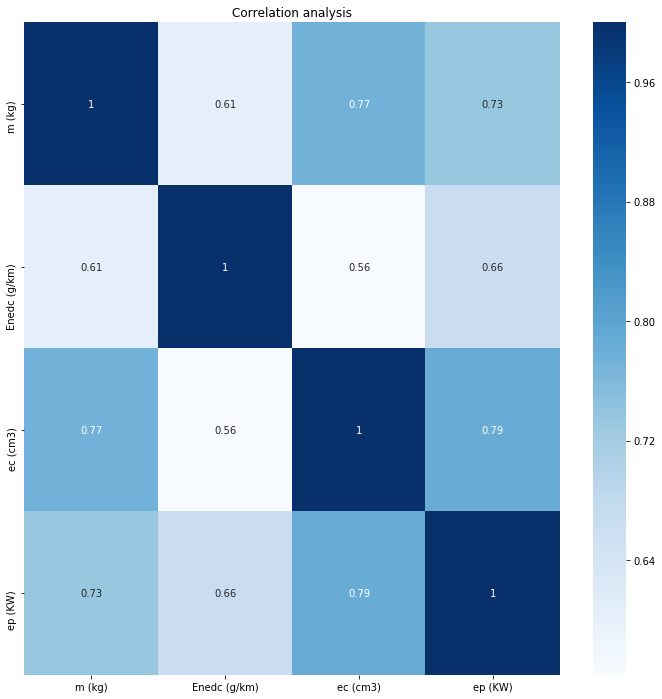

In [42]:
import seaborn as sns
fig = plt.figure(figsize=[12, 12])
corr_mtx = XY.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis')
plt.show()

In [43]:
df2 = df
df2['Ft'] = df2['Ft'].replace('PETROL', 0)
df2['Ft'] = df2['Ft'].replace('DIESEL', 1)
XY2 = df2.dropna()
XY2.head()

,Fabricante,CommercialName,m (kg),Enedc (g/km),Ft,ec (cm3),ep (KW)
0,VOLKSWAGEN,GOLF,1375.0,104.0,1.0,1598.0,85.0
1,VOLKSWAGEN,GOLF,1340.0,119.0,0.0,1498.0,110.0
2,VOLKSWAGEN,GOLF,1320.0,120.0,0.0,1498.0,110.0
3,VOLKSWAGEN,POLO,1145.0,104.0,0.0,999.0,70.0
4,VOLKSWAGEN,POLO,1145.0,104.0,0.0,999.0,70.0


In [45]:
Y2=XY2['Enedc (g/km)']
X2=XY2[['m (kg)','ec (cm3)','ep (KW)','Ft']]

In [46]:
lm2=LinearRegression()
lm2.fit(X2,Y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
lm2.coef_

array([ 5.40879228e-02,  1.72812603e-02,  4.57921958e-02, -2.66822078e+01])

In [48]:
lm2.score(X2,Y2)

0.6740223371787819

In [49]:
lm2.intercept_ # beta0

29.705456863284923